<a href="https://colab.research.google.com/github/vimuth97/FYP-Brain-Tumor-Classification/blob/main/Basic%20pathology%20model/split_regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import time
import argparse
import pdb
import pandas as pd
import math
import xml.etree.ElementTree as ET
from xml.dom import minidom
import multiprocessing as mp
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import itertools
import pickle
!apt update && apt install -y openslide-tools
!pip install openslide-python 
import openslide 

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [6]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def getProcessedImages():
    lines = []
    with open('gdrive/My Drive/RESULTS_DIRECTORY/Processed_Images.txt','r') as file:
        line = file.readline().strip()
        while line != "":
            lines.append(line)
            line = file.readline().strip()
    return lines

def writeProcessedImages(data):
    str_data=""
    for i in data:
        str_data += i+"\n"
    with open('gdrive/My Drive/RESULTS_DIRECTORY/Processed_Images.txt','w') as file:
        file.write(str_data)

'''filesImage = getProcessedImages()
writeProcessedImages(filesImage)'''

'filesImage = getProcessedImages()\nwriteProcessedImages(filesImage)'

In [27]:
def splitRegions(source,regions_dir):
  #image = "CPM19_CBICA_AAB_1.tiff"
  slides = sorted(os.listdir(source))
  slides = [slide for slide in slides if os.path.isfile(os.path.join(source, slide))]
  
  processedImages = getProcessedImages()
  for file in slides:
    file_name = file.split(".")
    
    # TO avoid duplicates 
    #print(processedImages,file_name)
    if file_name[0] in processedImages:
        continue
    else:
        processedImages.append(file_name[0])
    full_path = os.path.join(source, file)
    #print(full_path)
    wsi = openslide.OpenSlide(full_path)

    # Read the image by 4000 x 4000 slides. To identify all the regions following method used.
    wsi_h, wsi_w = wsi.level_dimensions[0]

    width_coor=[i for i in range(0,wsi_w,4000)]
    height_coor=[i for i in range(0,wsi_h,4000)]
    
    # Adding last pixel coordinate to calclute acurate region sizes
    width_coor.append(wsi_w)
    height_coor.append(wsi_h)

    for ht in range (len(height_coor)-1):
      for wd in range (len(width_coor)-1):
        h0,w0 = height_coor[ht], width_coor[wd] 
        newFileName = file_name[0]+"-"+str(h0)+"_"+str(w0)+".tiff"
        savePath = os.path.join(regions_dir, newFileName)
        if not (os.path.isfile(savePath)):
          h_size,w_size = (height_coor[ht+1] - height_coor[ht]) , (width_coor[wd+1] - width_coor[wd])
          wsi_region = wsi.read_region((h0,w0),0,(w_size,h_size))    
          wsi_region.convert('RGB').save(savePath)
          print(newFileName+" file written.")
        else:
          print(newFileName+" already written.")


    writeProcessedImages(processedImages)
    print(file_name[0]+" completely broken into regions")
    
  print(processedImages)
  



splitRegions('gdrive/My Drive/Data_Directory','gdrive/My Drive/Regions')

Remove Already preprocessed region files only. This code segment will remove all sub region images related files in **processed images.txt** file

In [ ]:
''''def removeProcessedRegions():
    source = 'gdrive/My Drive/Regions'
    files = os.listdir(source)

    current_images = getProcessedImages()
    print(current_images)
    print(files)
    for file in files:
        full_path = os.path.join(source, file)
        file_name = file.split(".") # Split from type
        file_name = file_name[0].split("-")
        if file_name[0] in current_images:
            print(full_path)
            os.remove(full_path)
            print(file+" file removed.")
            


removeProcessedRegions()''''

In [21]:
full_path = 'gdrive/My Drive/Data_Directory/CPM19_CBICA_AAG_1.tiff'
wsi = openslide.open_slide(full_path) #CPM19_CBICA_AAG_1-_20000
wsi_w, wsi_h = wsi.level_dimensions[0]

wsi.level_dimensions[0]

(149464, 97088)

In [24]:
'''wsi_h, wsi_w''' 
wsi_region = wsi.read_region((145464,93088),0,(5000,5000))  

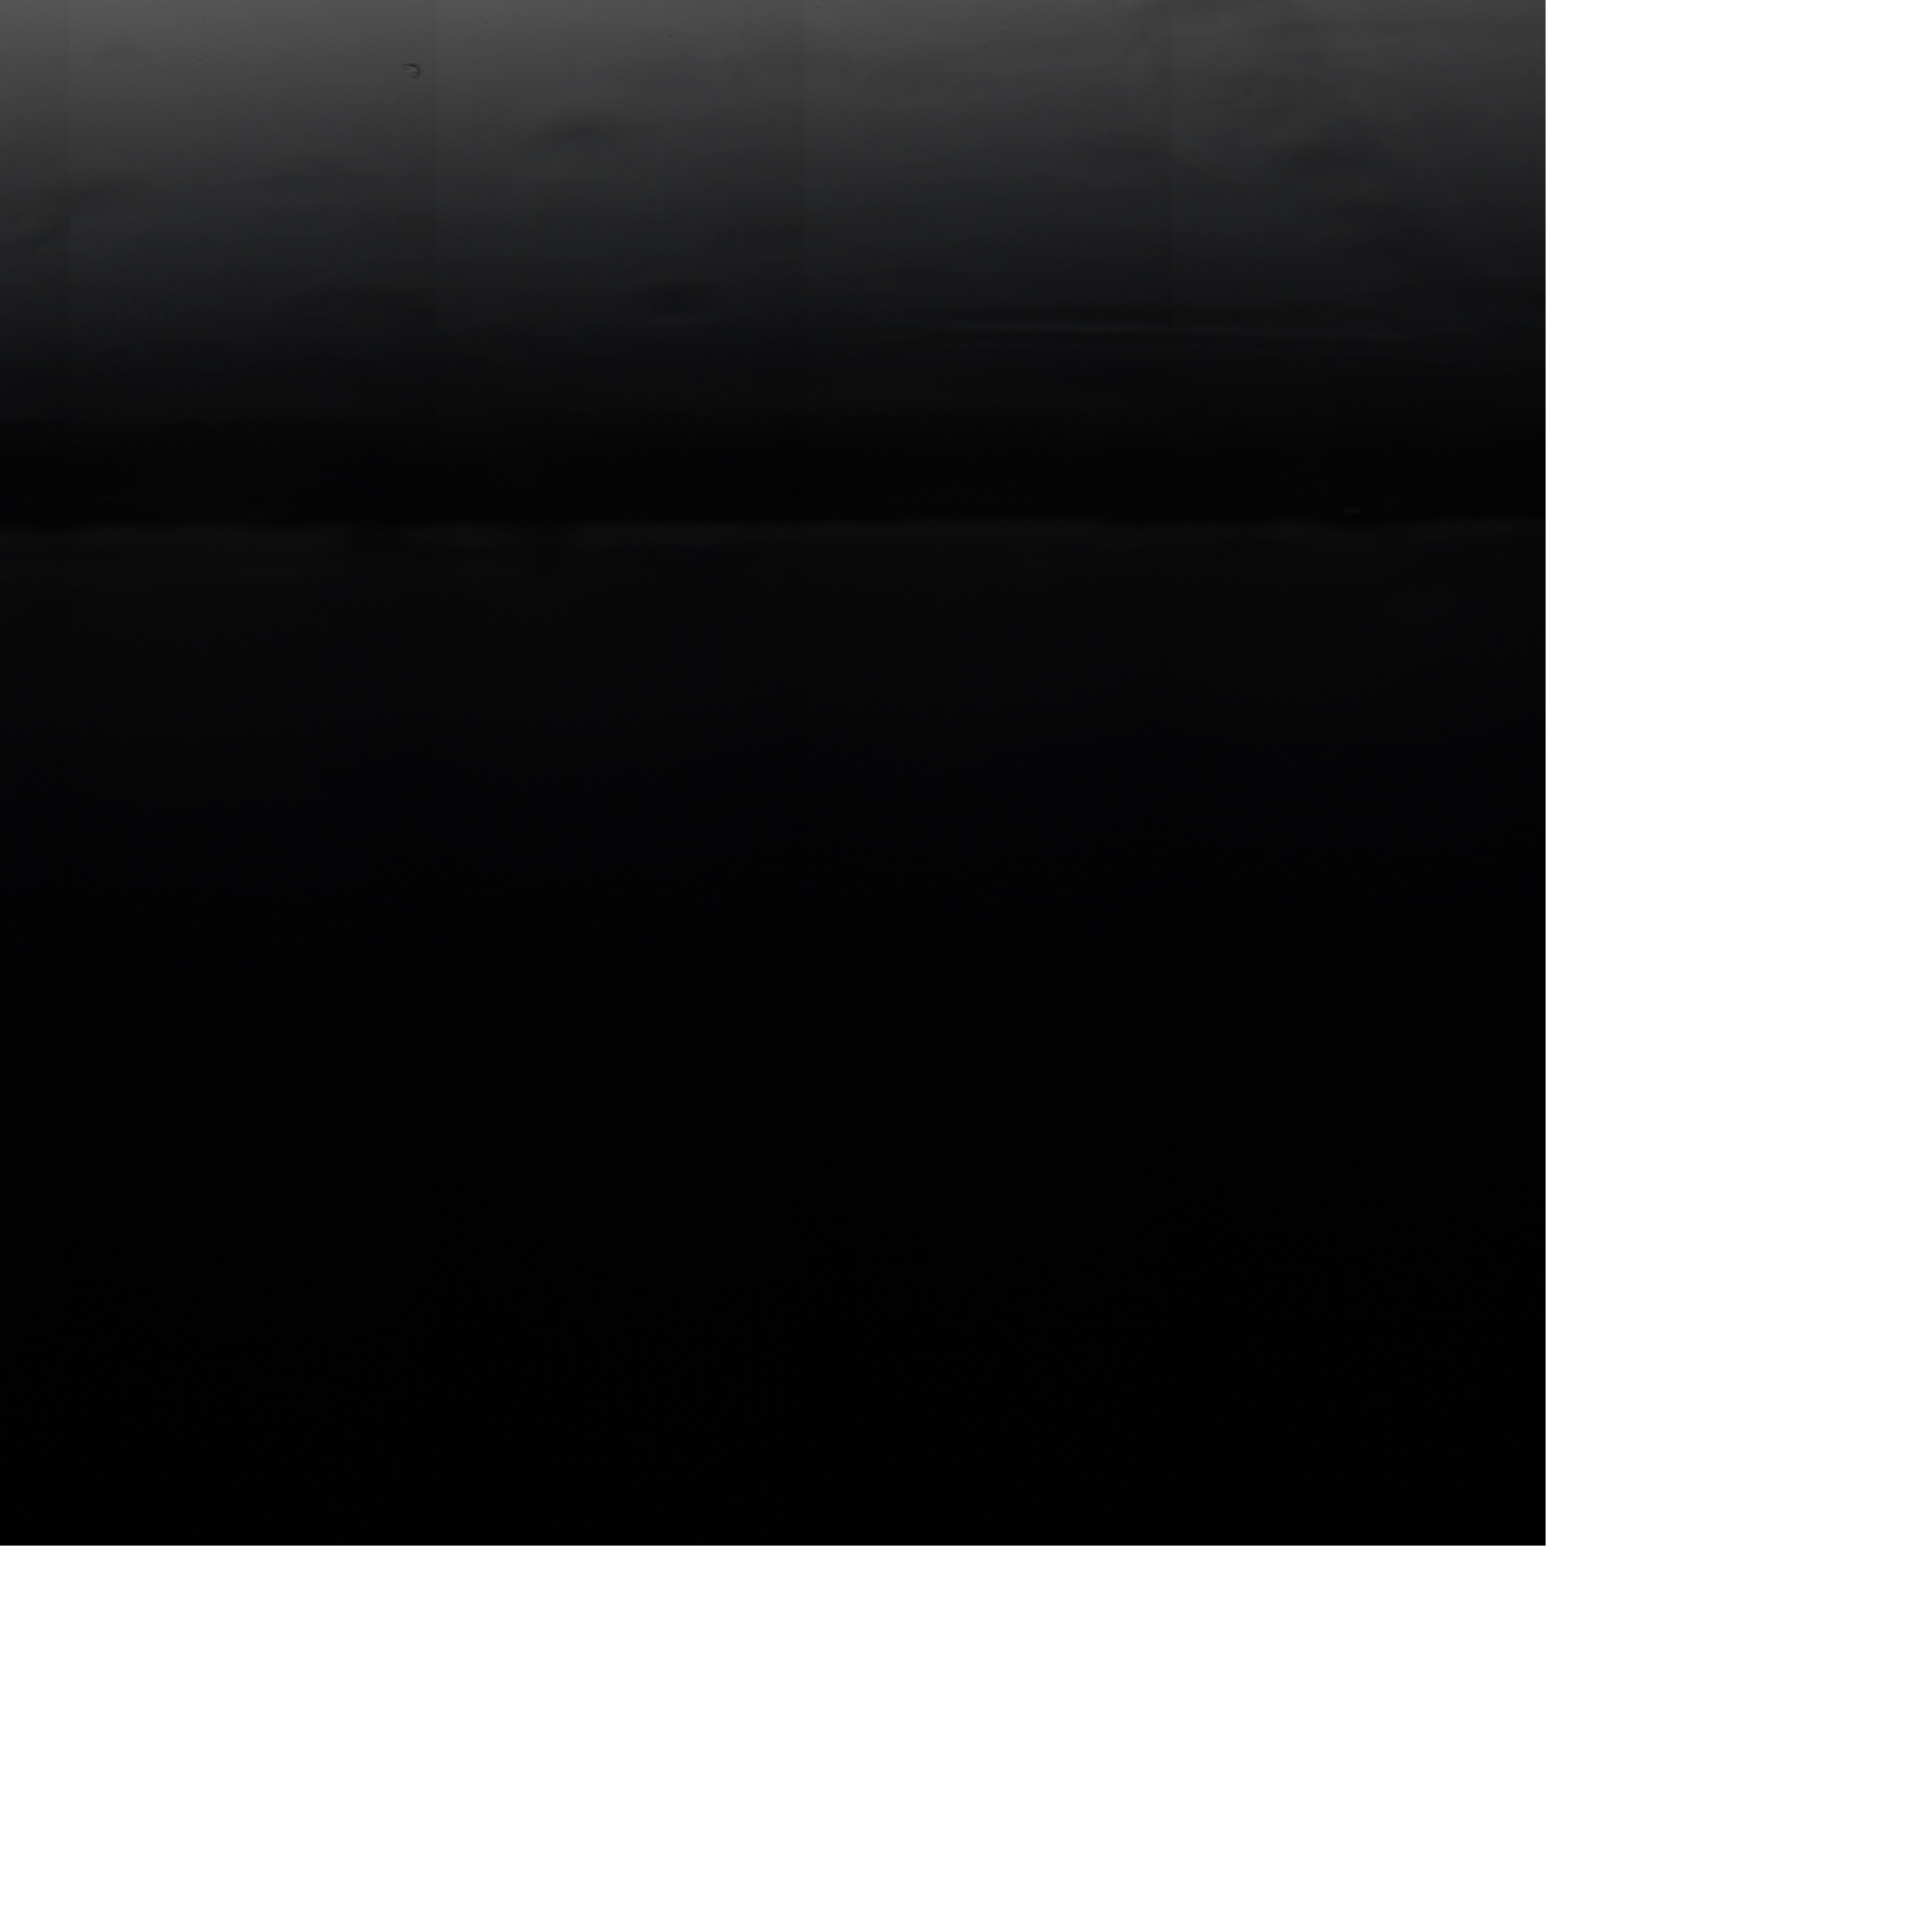

In [25]:
'''wsi.level_dimensions'''
wsi_region

In [ ]:
wsi_h, wsi_w = wsi.level_dimensions[0]

width_coor=[i for i in range(0,wsi_w,4000)]
height_coor=[i for i in range(0,wsi_h,4000)]
    
# Adding last pixel coordinate to calclute acurate region sizes
width_coor.append(wsi_w)
height_coor.append(wsi_h)

for ht in range (len(height_coor)-1):
    for wd in range (len(width_coor)-1):
        h0,w0 = height_coor[ht], width_coor[wd] 
        newFileName = file_name[0]+"-"+str(h0)+"_"+str(w0)+".tiff"
        savePath = os.path.join(regions_dir, newFileName)
        if not (os.path.isfile(savePath)):
          h_size,w_size = (height_coor[ht+1] - height_coor[ht]) , (width_coor[wd+1] - width_coor[wd])
          wsi_region = wsi.read_region((h0,w0),0,(w_size,h_size))   

# Update already preprocessed images
This code segment needed in the initial phase only.

In [ ]:
''' '''

#print(getAllImageNamesInMask('gdrive/My Drive/RESULTS_DIRECTORY/masks'))  #getAlreadyWrittenImages('gdrive/My Drive/RESULTS_DIRECTORY/Processed_Images.txt')